In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('employees.csv')

In [7]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [9]:
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [13]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [17]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [23]:
cols_with_nulls = ["First Name", "Gender", "Senior Management", "Team"]

print(" Most Frequent Values for Columns with Nulls:")
for col in cols_with_nulls:
    mode_val = df[col].mode()
    if not mode_val.empty:
        print(f"{col}: {mode_val[0]}")
    else:
        print(f"{col}: No mode found")


 Most Frequent Values for Columns with Nulls:
First Name: Marilyn
Gender: Female
Senior Management: True
Team: Client Services


In [27]:
df["First Name"] = df["First Name"].fillna("Marilyn")
df["Gender"] = df["Gender"].fillna("Female")
df["Senior Management"] = df["Senior Management"].fillna(True)
df["Team"] = df["Team"].fillna("Client Services")

In [29]:
df.isna().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [99]:
idx = df.groupby('Team')['Salary'].idxmax()
highest_paid_per_team = df.loc[idx, ['Team', 'First Name', 'Salary']]
highest_paid_per_team = highest_paid_per_team.sort_values(by='Salary', ascending=False)
print(highest_paid_per_team)

                     Team First Name  Salary
644               Finance  Katherine  149908
429       Human Resources       Rose  149903
828               Product    Cynthia  149684
186                 Sales    Marilyn  149654
740             Marketing    Russell  149456
793          Distribution     Andrea  149105
981                 Legal      James  148985
850       Client Services    Charles  148291
721  Business Development     Harold  147417
541           Engineering       Ruby  147362


In [43]:
avg_salary_by_team=df.groupby("Team")["Salary"].mean().sort_values(ascending=False)
avg_salary_by_team

Team
Engineering             94269.195652
Finance                 92219.480392
Sales                   92173.436170
Business Development    91866.316832
Human Resources         90944.527473
Marketing               90435.591837
Legal                   89303.613636
Client Services         88957.073826
Product                 88665.505263
Distribution            88500.466667
Name: Salary, dtype: float64

C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\3852376385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_team.index, y=avg_salary_by_team.values, palette="Blues_d")


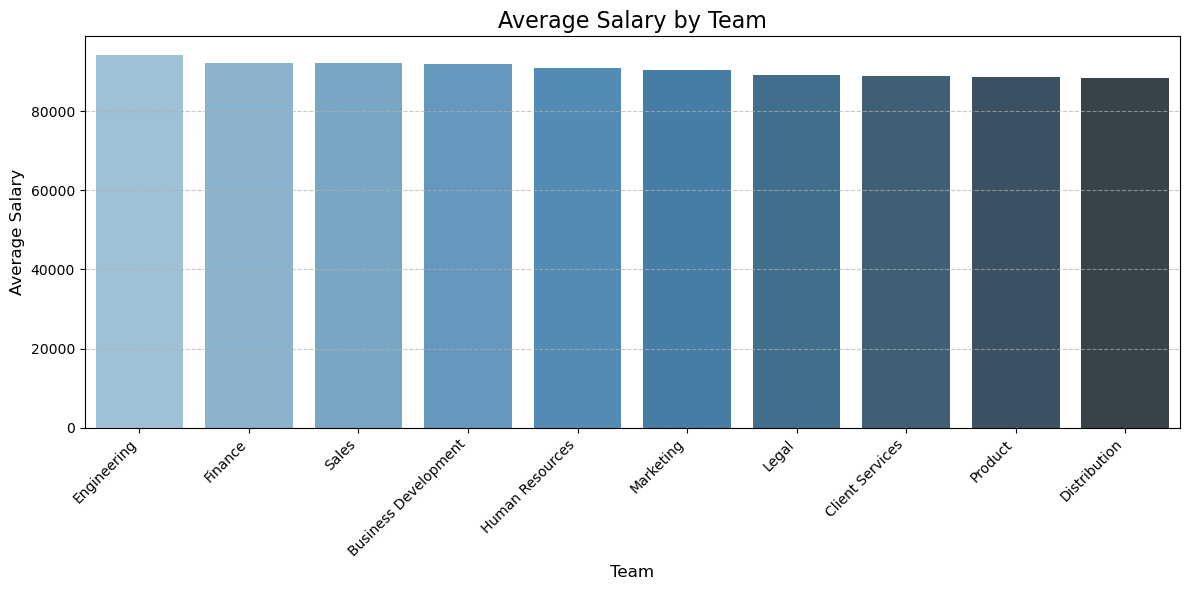

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_team.index, y=avg_salary_by_team.values, palette="Blues_d")

plt.title("Average Salary by Team", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Average Salary", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Average Salary by Team")
plt.show()

In [49]:
avg_bonus_by_gender=df.groupby("Gender")["Bonus %"].mean()
avg_bonus_by_gender

Gender
Female    10.095460
Male      10.359835
Name: Bonus %, dtype: float64

C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\1796783649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_bonus_by_gender.index, y=avg_bonus_by_gender.values, palette="pastel")


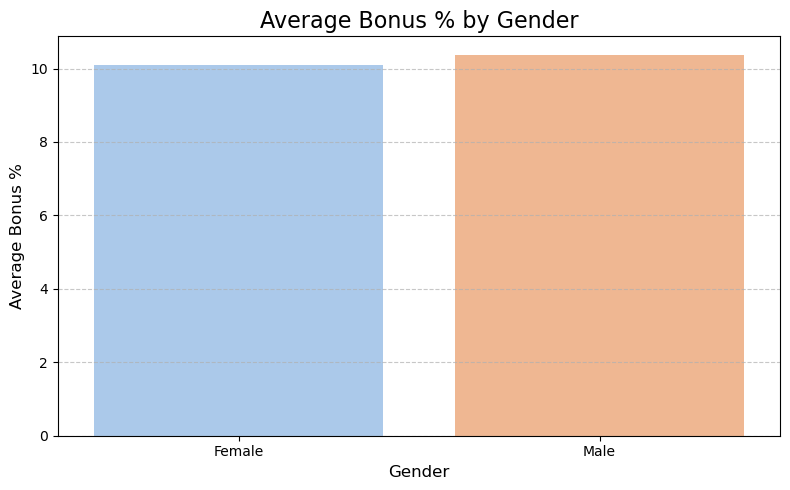

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_bonus_by_gender.index, y=avg_bonus_by_gender.values, palette="pastel")

plt.title("Average Bonus % by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Bonus %", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
senior_mgmt_counts=df.groupby("Team")["Senior Management"].value_counts().unstack().fillna(0)
senior_mgmt_counts

Senior Management,False,True
Team,,
Business Development,45,56
Client Services,74,75
Distribution,39,51
Engineering,37,55
Finance,51,51
Human Resources,40,51
Legal,45,43
Marketing,42,56
Product,54,41


C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\3672455136.py:10: UserWarning: Glyph 128084 (\N{NECKTIE}) missing from current font.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

C:\Users\ELOott\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128084 (\N{NECKTIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


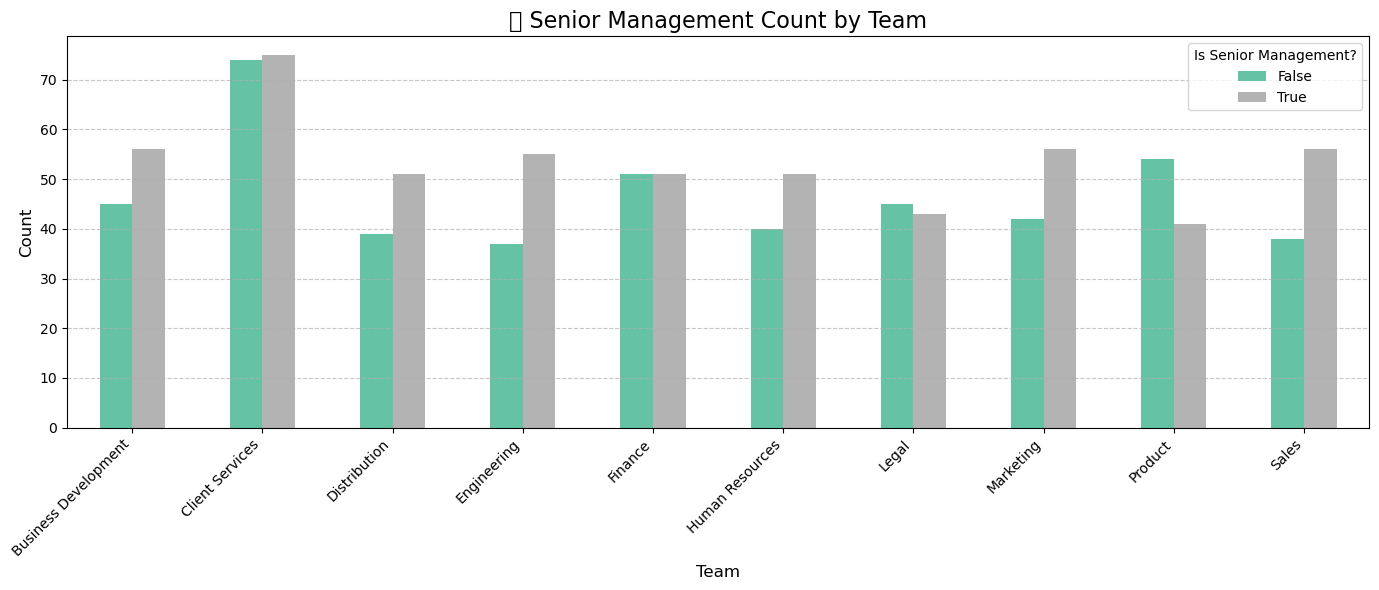

In [57]:
plt.figure(figsize=(14, 6))
senior_mgmt_counts.plot(kind='bar', stacked=False, colormap="Set2", figsize=(14, 6))

plt.title("👔 Senior Management Count by Team", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Is Senior Management?", loc='upper right')
plt.tight_layout()
plt.show()

In [59]:
gender_counts = df["Gender"].value_counts()
gender_counts

Gender
Female    576
Male      424
Name: count, dtype: int64

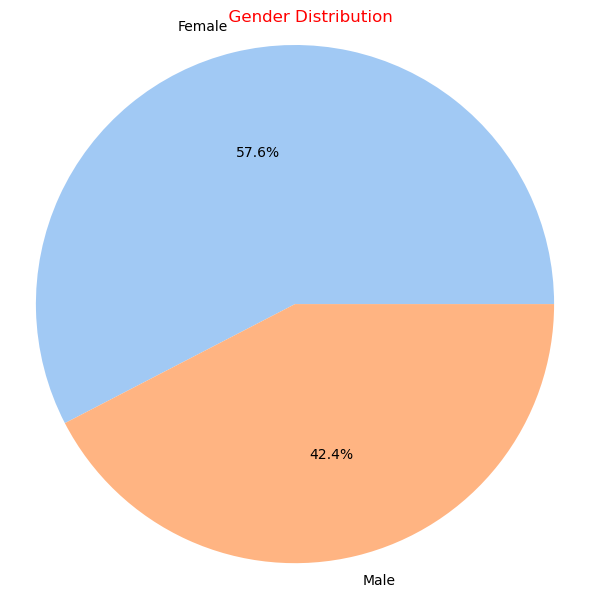

In [107]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("      Gender Distribution",color="red")
plt.axis('equal')
plt.tight_layout()
plt.savefig("Gender Distribution")
plt.show()

In [67]:
team_counts = df["Team"].value_counts()
team_counts

Team
Client Services         149
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: int64

C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\624511638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette="coolwarm")


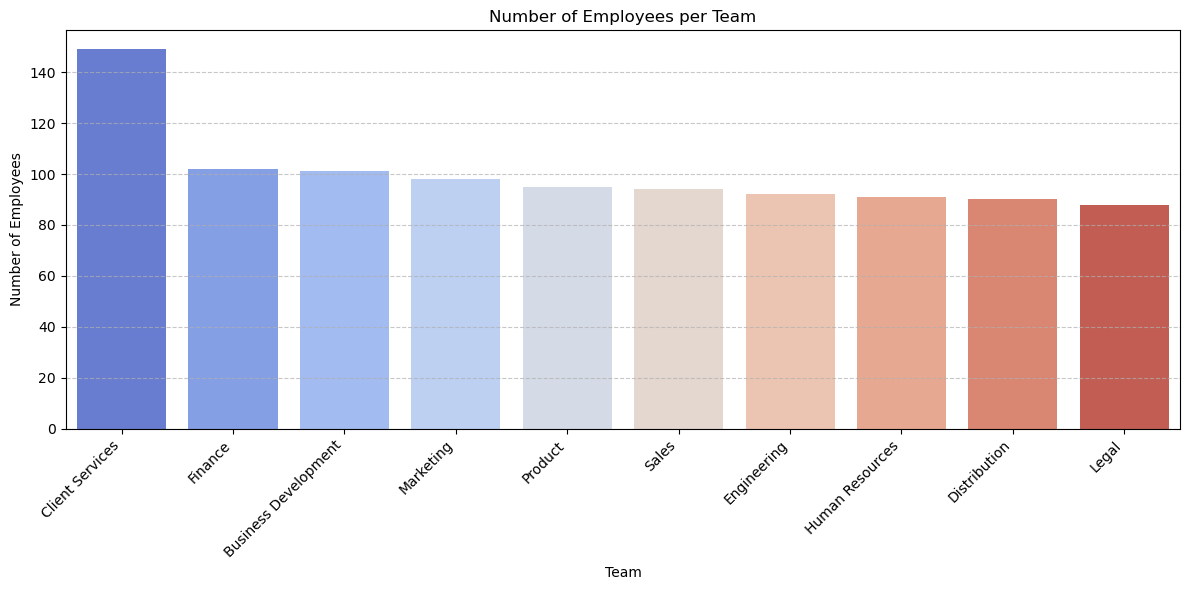

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(x=team_counts.index, y=team_counts.values, palette="coolwarm")

plt.title("Number of Employees per Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Number of Employees per Team")
plt.show()

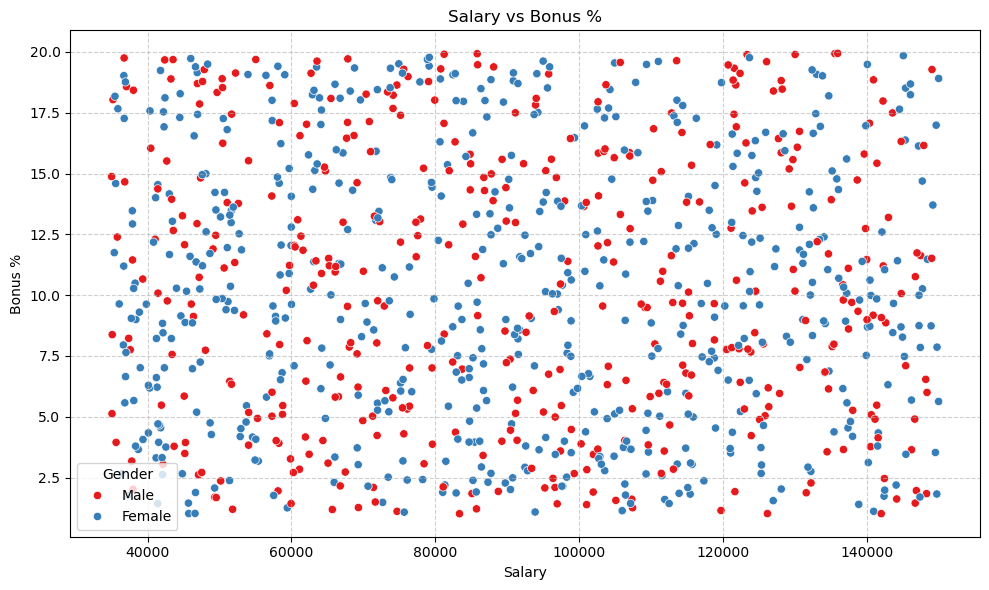

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Salary", y="Bonus %", hue="Gender", palette="Set1")

plt.title("Salary vs Bonus %")
plt.xlabel("Salary")
plt.ylabel("Bonus %")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\3971597437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Salary", palette="Set3")
C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\3971597437.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\ELOott\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


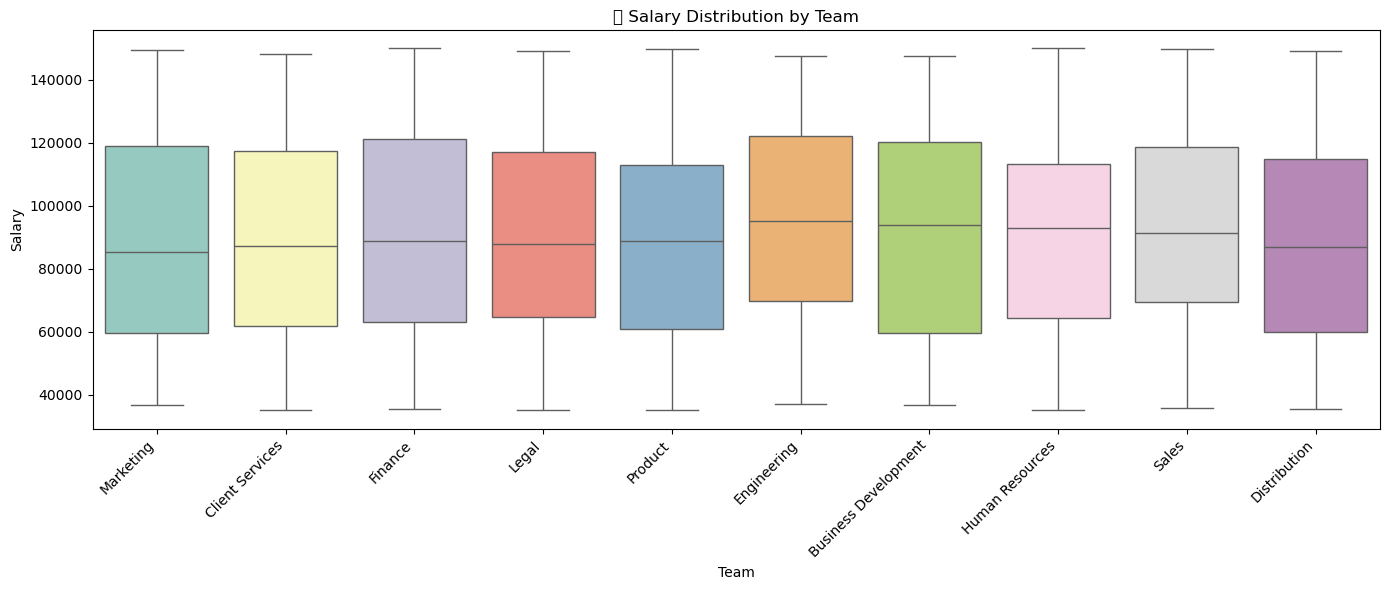

In [73]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Team", y="Salary", palette="Set3")

plt.title("Salary Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Salary")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

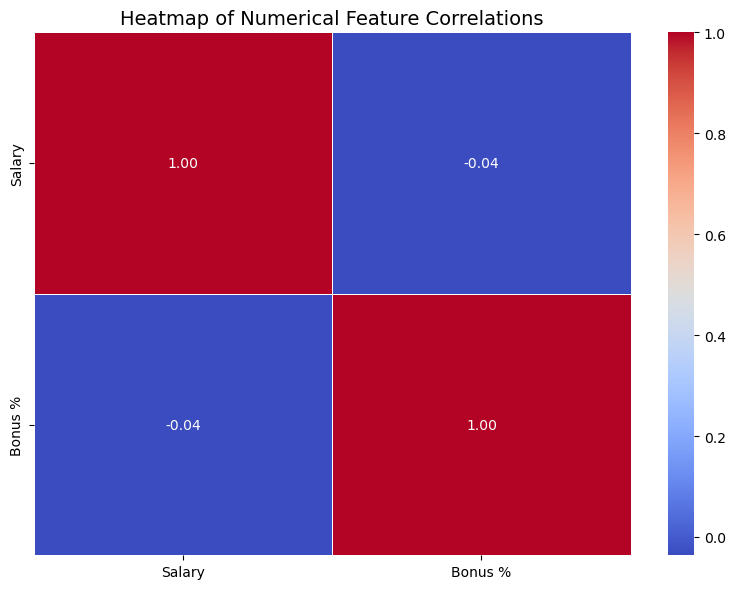

In [75]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Numerical Feature Correlations", fontsize=14)
plt.tight_layout()
plt.show()

In [77]:
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["Tenure (Years)"] = (pd.Timestamp.today() - df["Start Date"]).dt.days // 365
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Tenure (Years)
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,31
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,Client Services,29
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,32
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,20
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,27
...,...,...,...,...,...,...,...,...,...
995,Henry,Female,2014-11-23,6:09 AM,132483,16.655,False,Distribution,10
996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance,41
997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product,12
998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development,12


C:\Users\ELOott\AppData\Local\Temp\ipykernel_6772\1183768019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tenure (Years)", y="Bonus %", data=df, palette="coolwarm")


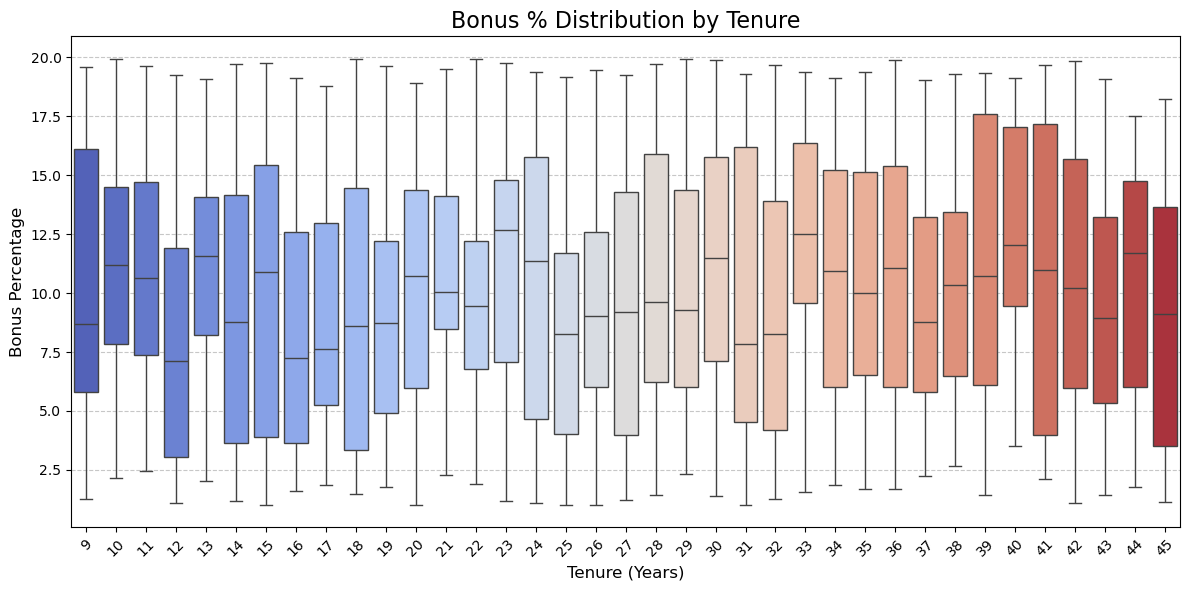

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Tenure (Years)", y="Bonus %", data=df, palette="coolwarm")

plt.title("Bonus % Distribution by Tenure", fontsize=16)
plt.xlabel("Tenure (Years)", fontsize=12)
plt.ylabel("Bonus Percentage", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
tenure_salary_avg = df.groupby("Tenure (Years)")["Salary"].mean().sort_index()
display(tenure_salary_avg)

Tenure (Years)
9     100084.217391
10    100097.640000
11     88598.666667
12     92574.000000
13     87337.303030
14     85026.807692
15     94002.000000
16    103562.551724
17     87654.971429
18     88997.833333
19     98940.720000
20     83636.388889
21     89988.500000
22     93540.000000
23     76951.793103
24     87352.416667
25     82978.638889
26     94068.173913
27     94942.777778
28     92295.580645
29     87806.903226
30     92228.162791
31     82363.588235
32    101465.541667
33     96376.925926
34     92487.000000
35     93462.047619
36    106810.000000
37     93345.423077
38     83447.545455
39     79647.454545
40     92608.652174
41     82409.440000
42    101091.333333
43     84887.964286
44     84455.363636
45     80632.222222
Name: Salary, dtype: float64

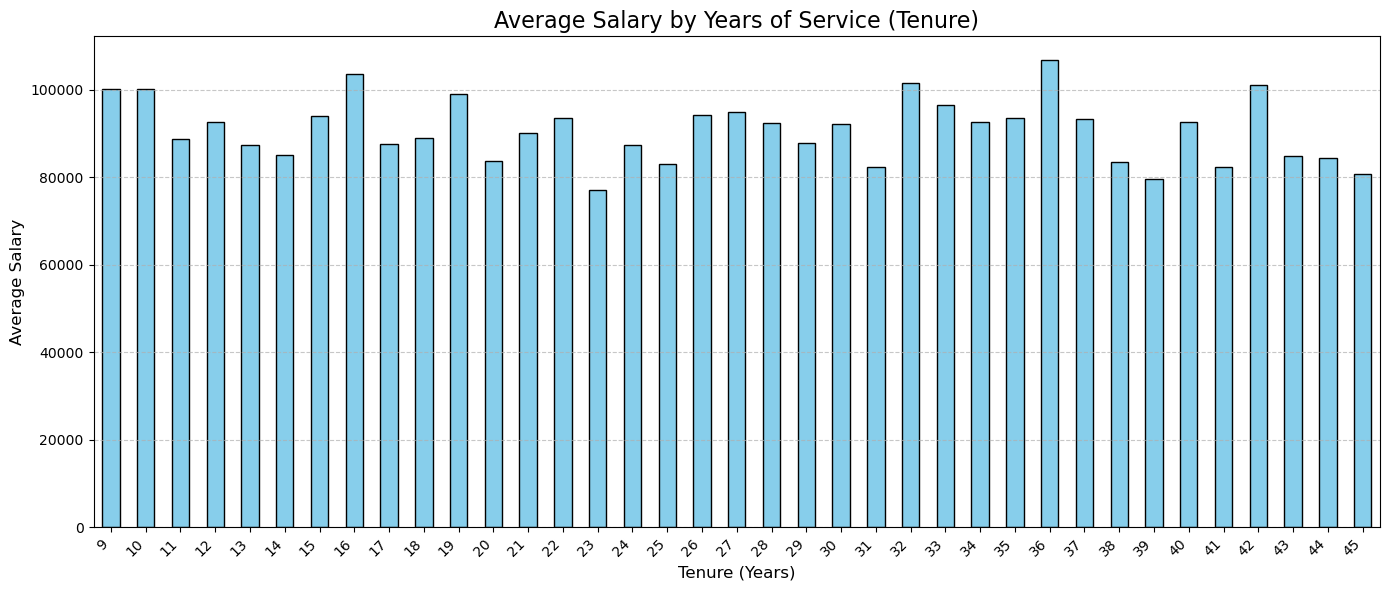

In [87]:
plt.figure(figsize=(14, 6))
tenure_salary_avg.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Salary by Years of Service (Tenure)", fontsize=16)
plt.xlabel("Tenure (Years)", fontsize=12)
plt.ylabel("Average Salary", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
df["Last Login Time"] = pd.to_datetime(df["Last Login Time"], format="%I:%M %p")
df["Login Period"] = df["Last Login Time"].dt.hour.apply(lambda x: "Morning" if 5 <= x < 12 else "Afternoon" if 12 <= x < 17 else "Evening")

In [91]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Tenure (Years),Login Period
0,Douglas,Male,1993-08-06,1900-01-01 12:42:00,97308,6.945,True,Marketing,31,Afternoon
1,Thomas,Male,1996-03-31,1900-01-01 06:53:00,61933,4.170,True,Client Services,29,Morning
2,Maria,Female,1993-04-23,1900-01-01 11:17:00,130590,11.858,False,Finance,32,Morning
3,Jerry,Male,2005-03-04,1900-01-01 13:00:00,138705,9.340,True,Finance,20,Afternoon
4,Larry,Male,1998-01-24,1900-01-01 16:47:00,101004,1.389,True,Client Services,27,Afternoon
...,...,...,...,...,...,...,...,...,...,...
995,Henry,Female,2014-11-23,1900-01-01 06:09:00,132483,16.655,False,Distribution,10,Morning
996,Phillip,Male,1984-01-31,1900-01-01 06:30:00,42392,19.675,False,Finance,41,Morning
997,Russell,Male,2013-05-20,1900-01-01 12:39:00,96914,1.421,False,Product,12,Afternoon
998,Larry,Male,2013-04-20,1900-01-01 16:45:00,60500,11.985,False,Business Development,12,Afternoon


In [95]:
login_counts = df['Login Period'].value_counts()
login_counts

Login Period
Evening      484
Morning      292
Afternoon    224
Name: count, dtype: int64

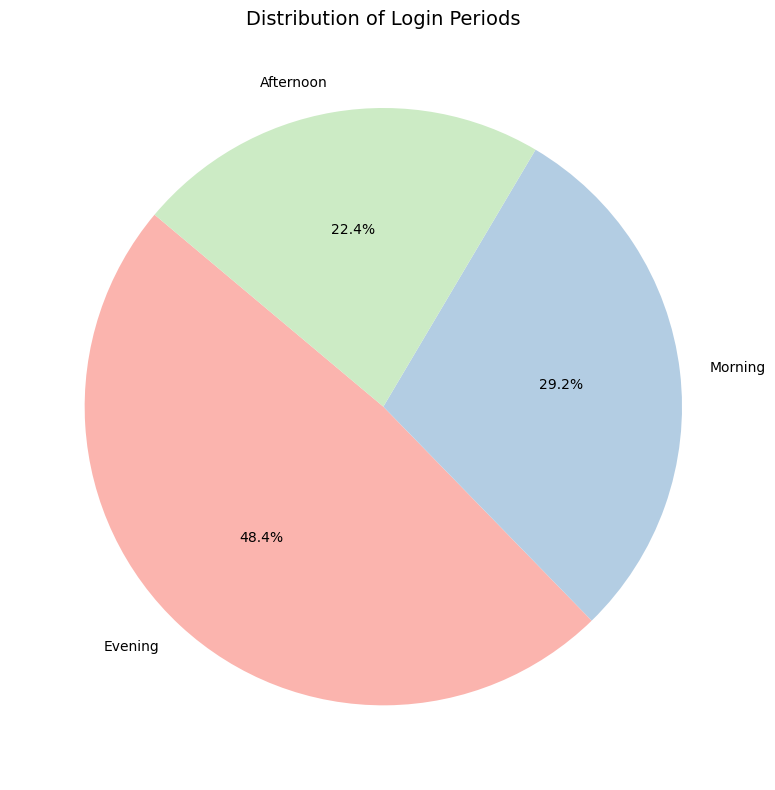

In [97]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Pastel1.colors  

login_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)

plt.title("Distribution of Login Periods", fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [101]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Tenure (Years),Login Period
0,Douglas,Male,1993-08-06,1900-01-01 12:42:00,97308,6.945,True,Marketing,31,Afternoon
1,Thomas,Male,1996-03-31,1900-01-01 06:53:00,61933,4.170,True,Client Services,29,Morning
2,Maria,Female,1993-04-23,1900-01-01 11:17:00,130590,11.858,False,Finance,32,Morning
3,Jerry,Male,2005-03-04,1900-01-01 13:00:00,138705,9.340,True,Finance,20,Afternoon
4,Larry,Male,1998-01-24,1900-01-01 16:47:00,101004,1.389,True,Client Services,27,Afternoon
